# COMP2002 Report

The coursework has two parts - one is a machine learning exercise and the second is about evolutionary computation.

- [ ] Part 1: Machine Learning
    - [x] 1.1 Data preparation (10%)
    - [ ] 1.2 Classification (20%)
    - [ ] 1.3 Assessment of classification (30%)
- [ ] Part 2: Optimisation
    - [ ] 2.1 Generation of random solutions (10%)
    - [ ] 2.2 Algorithm implementation (25%)
    - [ ] 2.3 Visualisation of results (15%)

## Part 1: Machine Learning

You have been provided with datasets relating to glass. Your task is to train and assess classification models that predict the type of glass based on 9 inputs.

- Data preparation
- Classification
- Assessment of classification

### Task 1.1 - Data preparation

The first phase of the work requires you to load the data you have been provided with into your selected program. Before the data can be used to train and test your models you must first prepare it – this means that the inputs must be converted to a suitable format. There is no missing data in the dataset.

> The data is loaded and normalised, and the code to do so is efficiently written.

In [357]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, normalize

In [358]:
data = pd.read_csv("glass_dataset.csv")

inputs = data.values[:, :-1] # All rows from all columns before the last column 
targets = data.values[:, -1] # All rows from the last columns

scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2)


In [359]:
# TEST BLOCK
print(inputs[:5]) # .head()
print(targets[:5])

[[ 0.87286765  0.28495326  1.25463857 -0.69244192 -1.12708201 -0.67170546
  -0.14576634 -0.35287683 -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 -0.17046023  0.10231907 -0.02621325
  -0.79373376 -0.35287683 -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249  0.19091171  0.43878673 -0.16453301
  -0.82894938 -0.35287683 -0.5864509 ]
 [-0.23283051 -0.24285268  0.69870999 -0.31099376 -0.0529737   0.11210651
  -0.51905192 -0.35287683 -0.5864509 ]
 [-0.31204471 -0.16920534  0.65006624 -0.41137486  0.55525631  0.08136879
  -0.62469878 -0.35287683 -0.5864509 ]]
[1. 1. 1. 1. 1.]


### Task 1.2 – Classification

Having prepared the data you must now build a classification tool that can predict new points. Use the following classification implementations within the respective program packages to construct predictors for the dataset:
- kNN
- SVM

For each of the models, you must investigate the optimal number of neighbours and an appropriate kernel shape from linear, polynomial and radial. You must demonstrate that each classifier can provide a prediction for a given input.

Note: for the polynomial kernel, restrict your investigation to polynomials of degree 2 and 3. 

> Both models are trained and tested correctly. The code used to do so is well organised and efficient.

In [360]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [361]:
# learning-uni\COMP2002\Workshops\Week2\Exercise3.ipynb

pca = PCA(n_components=2)
compressed = pca.fit_transform(inputs)

print(compressed[:5])

[[ 1.15113957 -0.52948764]
 [-0.57413717 -0.75978777]
 [-0.94015972 -0.92983597]
 [-0.14208328 -0.96167744]
 [-0.35109229 -1.09124921]]


In [362]:
# Cross Validation, Best K
k_vals = range(1, 30)
scores = []
for k in k_vals:
    classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    scores.append(np.mean(score))

# If you are dealing with numpy arrays or can afford numpy as a dependency, consider also using
# index_min = np.argmin(values)
best_k = k_vals[np.argmax(scores)]
print(best_k)
    

1


Text(0, 0.5, 'Accuracy Score')

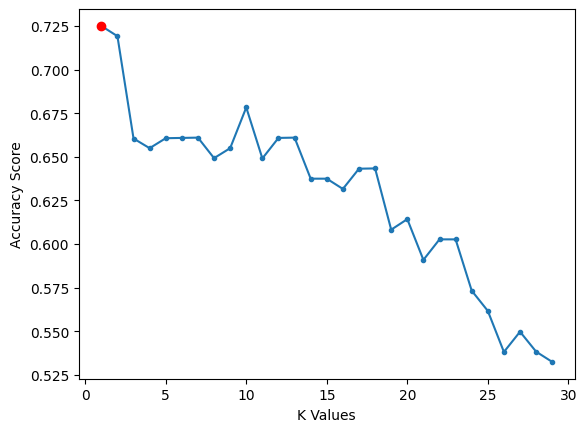

In [363]:
plt.figure()
plt.scatter([best_k], [scores[best_k-1]], c="r", marker="o", zorder=1)
plt.plot(k_vals, scores, ".-", zorder=0)
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [364]:
# Train the best kNN model
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)
knn_classified_data = knn_classifier.predict(inputs)

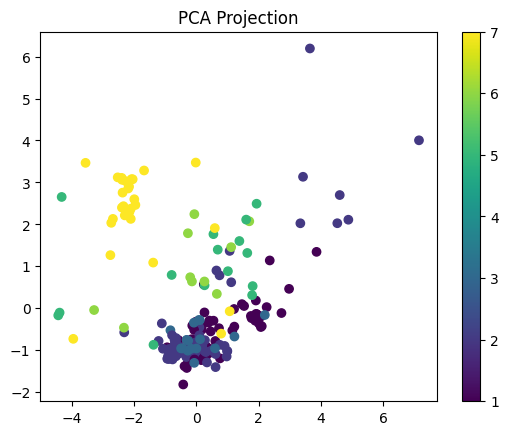

In [365]:
plt.figure()
plt.scatter(compressed[:, 0], compressed[:, 1], c=knn_classified_data)
plt.title("PCA Projection")
plt.colorbar()
plt.show()

In [366]:
# SVM
    

### Task 1.3 – Assessment of classification 

After identifying the best model parameters in the previous task, the classification models you have implemented must be assessed. To do this you are required to assess the accuracy for each model. You may use the accuracy implementation available to do this. It is not sufficient to report a single accuracy score. You must use cross-validation to report training results and report these values using a plot. You will also need to write a summary analysing your results and findings. 

> Accuracy is used in combination with crossvalidation, and the results are presented with a boxplot. The code is efficient and well organised. Analysis of the results is complete and well understood. 

## Part 2 – Optimisation

The second part of this assignment requires you to construct an algorithm that can optimise single-objective optimisation problems. 

The problems are as follows:

Problem | Formulation
--- | ---
Schaffer Function N.2 | $f(x, y) = 0.5 + \frac{\sin(x^2-y^2)^2 - 0.5}{[1+0.001(x^2+y^2)]^2}$
Modified Ackley Function | $f(x, y) = -20 \exp \left(-0.2 \sqrt{0.5 (x^2 + y^2)} \right) - \exp \left[ 0.5 \left(\cos(2\pi x) + \cos(2\pi y) \right) \right] + 20$
Easom Function | $f(x, y) = -\cos(x) \cos(y) \exp \left(-\left( (x - \pi)^2 + (y - \pi)^2 \right) \right)$

Each solution should have $D = 2$ continuous decision variables that can take any value (you are recommended to start with random values between -5 and 5 for all three problems).


### Task 2.1 – Generation of random solutions

You must use an evolutionary algorithm (EA). When evaluating an EA it is standard to compare against randomness. Generate 500 random solutions to the problem and plot their fitness values. You should plot the x and y values and colour the solutions according to their fitness value.

> The data is loaded and the fitness function is correct. Random solutions are generated correctly. The code to do so is efficiently structured.

### Task 2.2 – Algorithm implementation

You should implement a population-based evolutionary algorithm as described in the lectures. Your algorithm must have the following features:
- A crossover operator that performs uniform crossover.
- A mutation operator that performs an additive Gaussian mutation.
- A selection operator that combines a generation’s parent and child populations and identifies the parent solutions for the next generation.

> The mutation operators and algorithm have been implemented correctly. The fitness archive stores fitnesses correctly. The code is efficiently structured and well organised.

### Task 2.3 – Visualisation of results

Modify your optimiser to record the average fitness at each generation. Then, after your optimiser has run, produce a plot showing the change in average fitness over the runtime of the algorithm.

Your visualization code must be separate from the optimiser.

> A graph shows the correct results and the correct experimental setup has been followed.

***

## Resources

[Genertic Algorithms Explained By Example](https://www.youtube.com/watch?v=uQj5UNhCPuo)
<br>

[Grokking Algorithms](C:/Users/richa/Desktop/ebooks/Aditya%20Bhargava%20-%20Grokking%20Algorithms_%20An%20illustrated%20guide%20for%20programmers%20and%20other%20curious%20people-Manning%20Publications%20(2016).pdf)